### Task-5: The Heart Disease Analysis Project

#### Description:
The Heart Disease Analysis project involves analysing a dataset related to heart disease to identify key factors that contribute to heart disease occurrence. The goal is to use data analytics techniques to predict the likelihood of heart disease based on various health indicators such as age, cholesterol level, blood pressure and other relevant features. The analysis aims to provide insights that can help in early diagnosis and prevention.
#### Responsibility:
1. **Data Cleaning:** Handled missing data, outliers and inconsistencies to ensure the dataset was suitable for analysis.
2. **Exploratory Data Analysis(EDA):** Performed EDA to understand the distribution of data, relationships between variables.
3. **Question Formulation:** Developed specific minimum 7 questions related to heart disease and solve each question by using appropriate function.
4. **Data Visualization:** Created visualization using tool like Matplotlib, Seaborn to effectively present the findings and insights gained from the analysis. This included charts, graphs and other visual aids to make the results easy to understand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Manish Yadav\\Downloads\\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


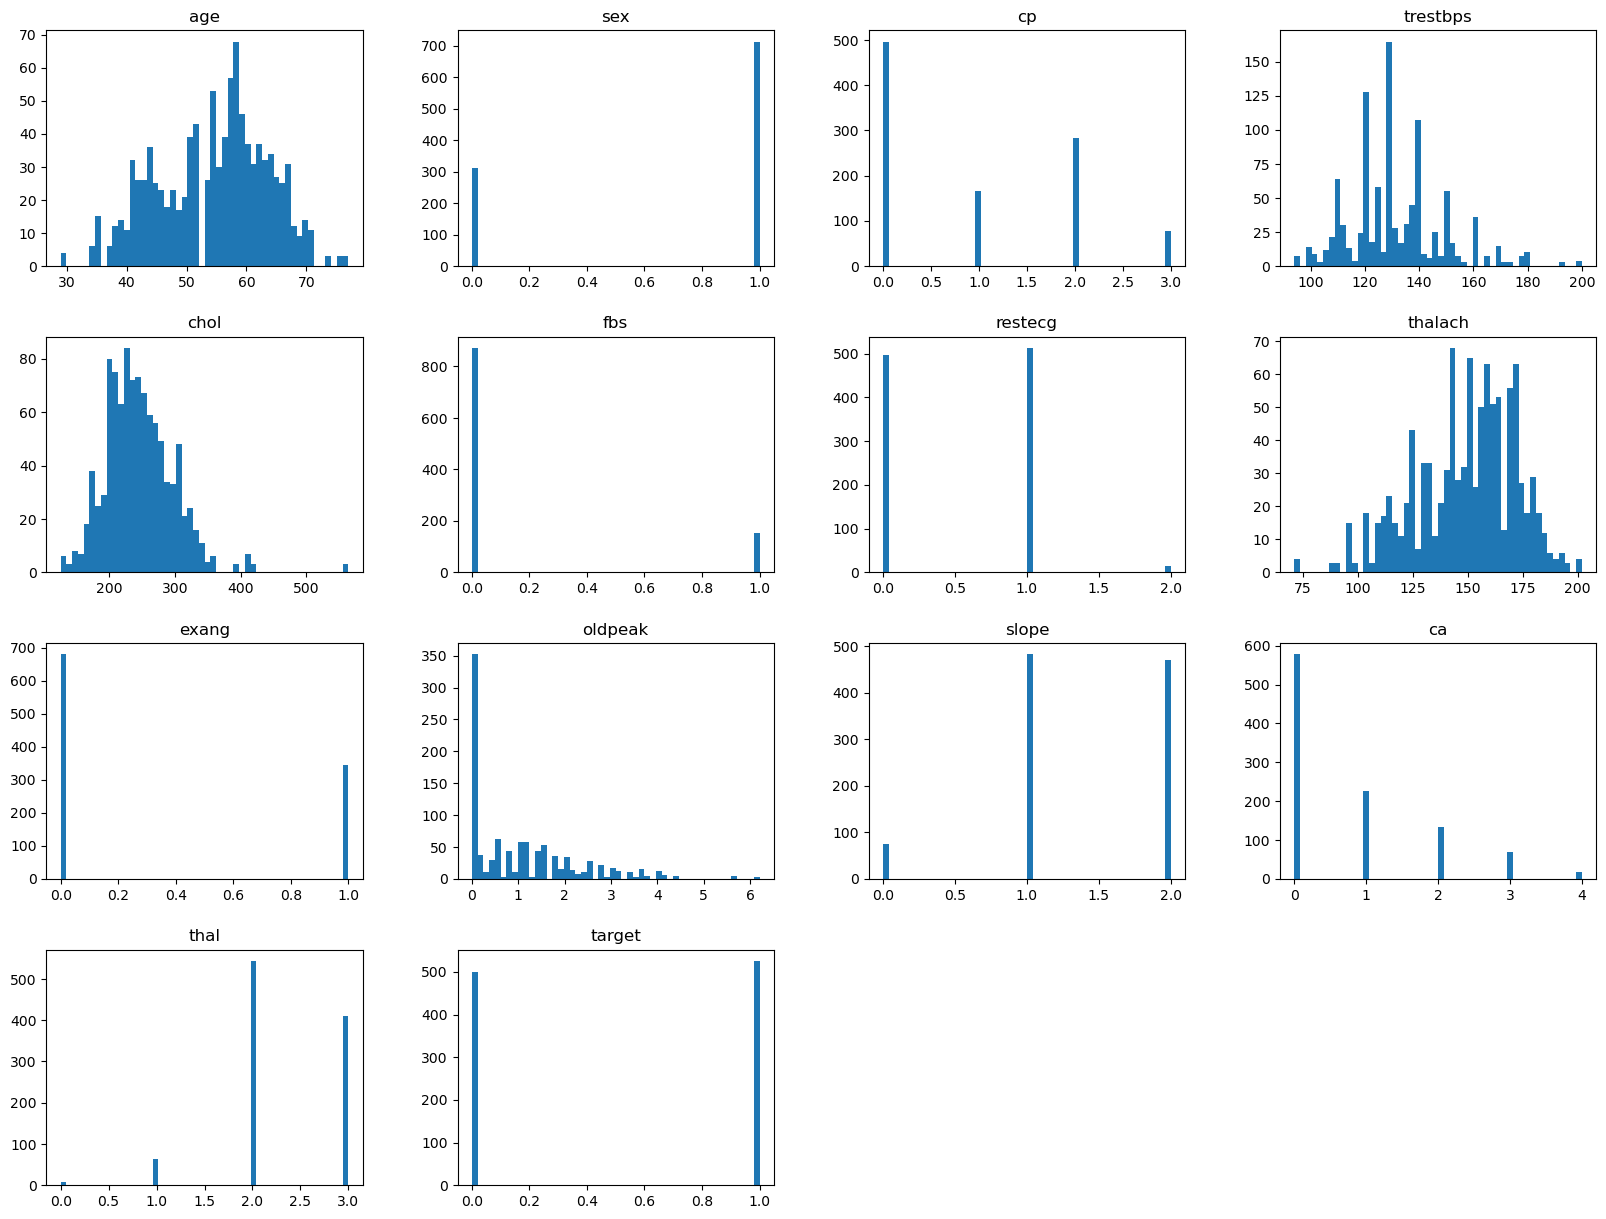

In [8]:
df.hist(bins=50, grid=False, figsize=(20,15));

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

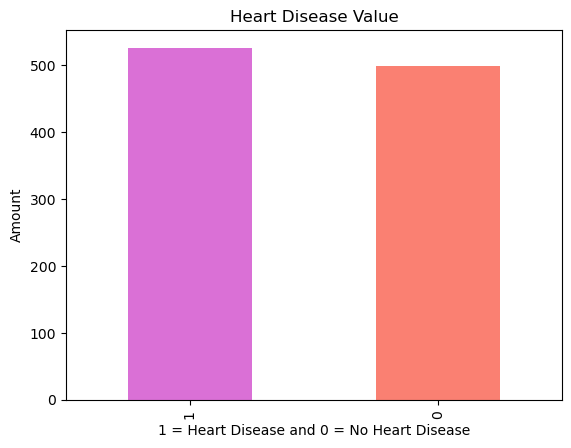

In [11]:
#1. How many people have heart disease and how many people does not have heart disease?
df.target.value_counts().plot(kind='bar',color=['orchid','salmon'])
plt.title('Heart Disease Value')
plt.xlabel('1 = Heart Disease and 0 = No Heart Disease')
plt.ylabel('Amount')
plt.show()

#### Observation:
526 people have heart disease out of 1025.

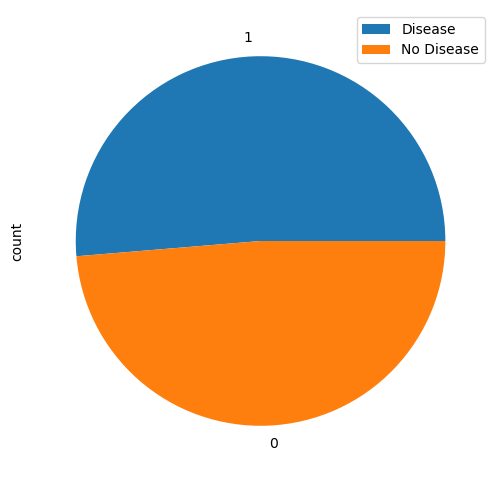

In [12]:
df.target.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(['Disease', 'No Disease'])
plt.show()

In [13]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

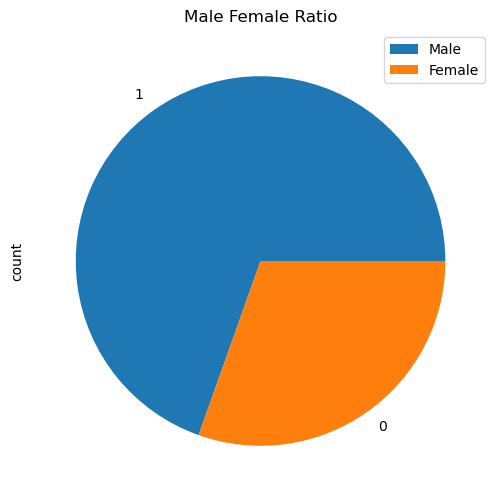

In [14]:
#2. Find Male and Female Ratio.
df.sex.value_counts().plot(kind='pie', figsize=(8,6))
plt.title('Male Female Ratio')
plt.legend(['Male','Female'])
plt.show()

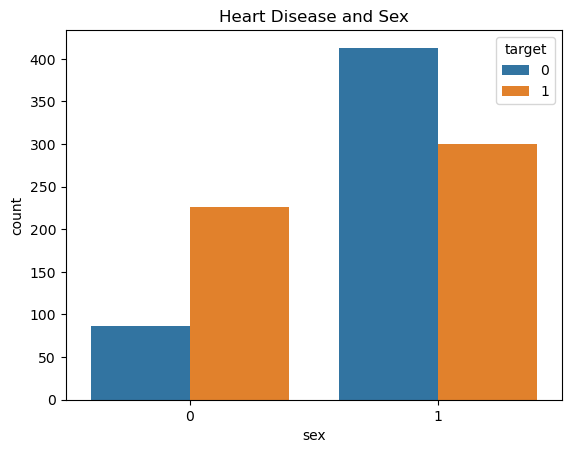

In [15]:
#3. People of which sex has the most heart disease?
sns.countplot(df, x = 'sex', hue = 'target')
plt.title('Heart Disease and Sex')
plt.show()

#### Observation:
Males are more likely to have heart disease.

In [16]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

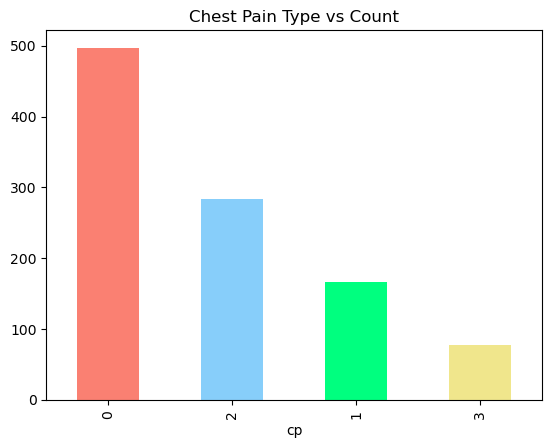

In [17]:
#4. Visualize Chest Pain Type with Count.
df.cp.value_counts().plot(kind='bar', color=['salmon','lightskyblue','springgreen','khaki'])
plt.title('Chest Pain Type vs Count');

In [18]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


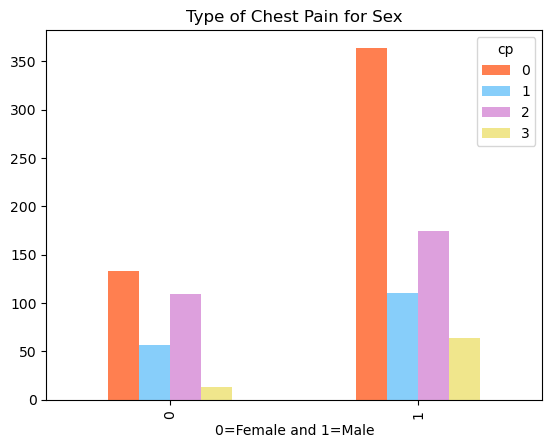

In [19]:
#5. People of which sex have which chest pain the most?
pd.crosstab(df.sex,df.cp).plot(kind='bar', color=['coral','lightskyblue','plum','khaki'])
plt.title('Type of Chest Pain for Sex')
plt.xlabel('0=Female and 1=Male');

#### Observation:
Female have type-0 chest pain the most and males have type-0 and type-2 majorly.

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


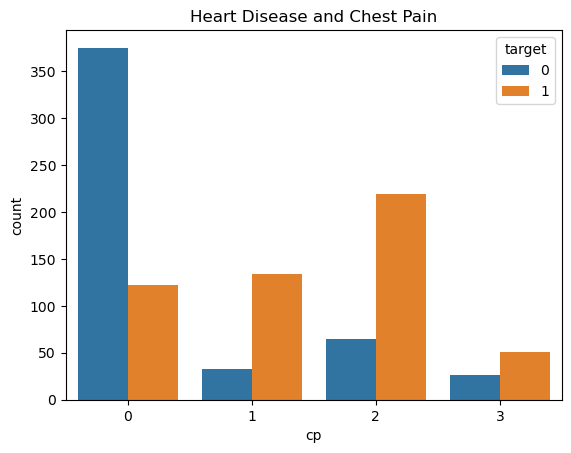

In [21]:
#6. People with which chest pain are most prone to have heart disease?
sns.countplot(x='cp', data=df, hue='target')
plt.title('Heart Disease and Chest Pain')
plt.show()

#### Observation:
Type-2 chest pain is more prone to heart disease.

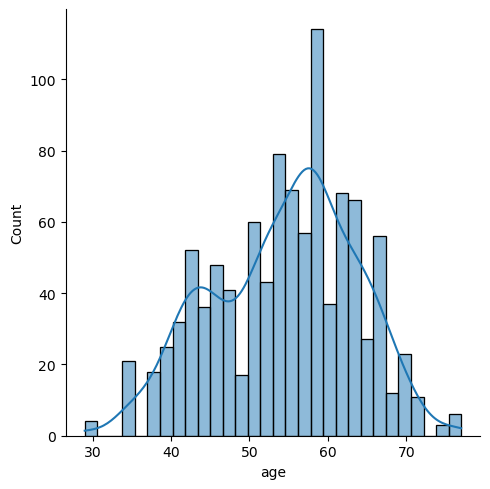

In [22]:
#7. Which age group is more prone to heart disease?
sns.displot(x='age', data=df, bins=30, kde=True)
plt.show()

#### Observation:
53-60 age group is more likely to have a heart disease.